In [2]:
import process
df = process.processed_data()

In [89]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

colors = df.loc[:,['colorCode', 'returnQuantity']]
colors['10'] = list(pd.cut(colors['colorCode'], range(0, 10001, 10)))
colors['100'] = list(pd.cut(colors['colorCode'], range(0, 10001, 100)))
colors['1000'] = list(pd.cut(colors['colorCode'], range(0, 10001, 1000)))

# Bin purity
Three bins are considered. Splitting by 1000, 100, or 10. Charts are showing each bin's return probability in the top and its count below. To see impurity, mean returnQuantity and standard deviation of the quantity print `dmc.evaluation.features(colors)` or access cuts with `evaluation.loc['1000',:]`.

In [98]:
import matplotlib.pyplot as plt
import dmc

evaluation = dmc.evaluation.features(colors)

count      gini   retProb    avgRet    stdRet
value                                                        
(0, 1000]       74374  0.503866  0.487563  0.492511  0.511328
(1000, 2000]  1487172   0.49977  0.532482  0.534414  0.503118
(2000, 3000]   209762   0.49972  0.528165  0.529481  0.501951
(3000, 4000]   325390  0.501193  0.489502  0.491048  0.503242
(4000, 5000]      525  0.498678  0.525714  0.525714  0.499815
(6000, 7000]    53711  0.476709  0.613115   0.61507  0.490736
(7000, 8000]   127065  0.485782  0.590052  0.591815  0.495216
(8000, 9000]    15169  0.188289  0.105215  0.105215   0.30684

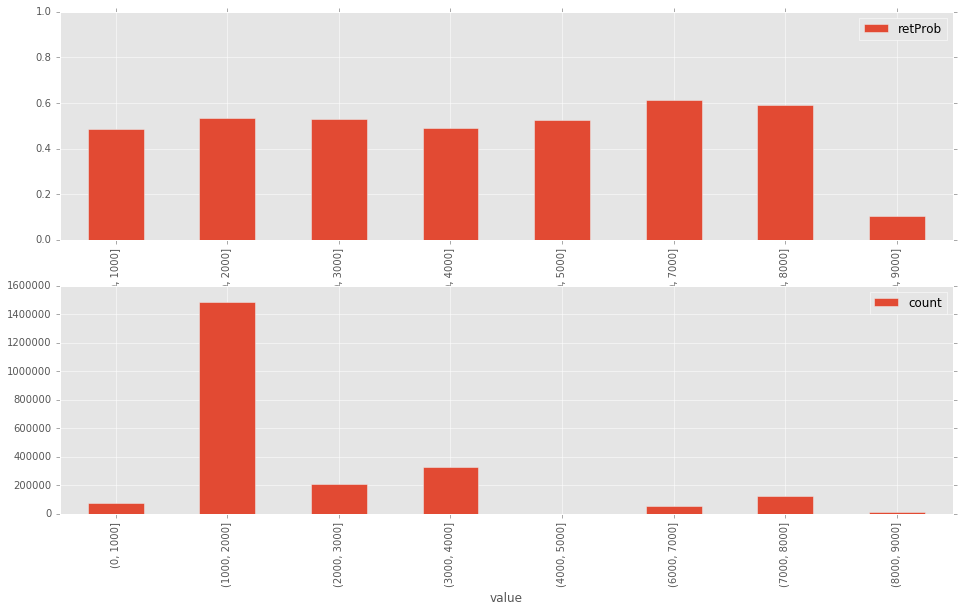

In [95]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches([16, 9])
evaluation.loc['1000', ['retProb']].plot(kind='bar', ax=axes[0], ylim=[0, 1])
evaluation.loc['1000', ['count']].plot(kind='bar', ax=axes[1])

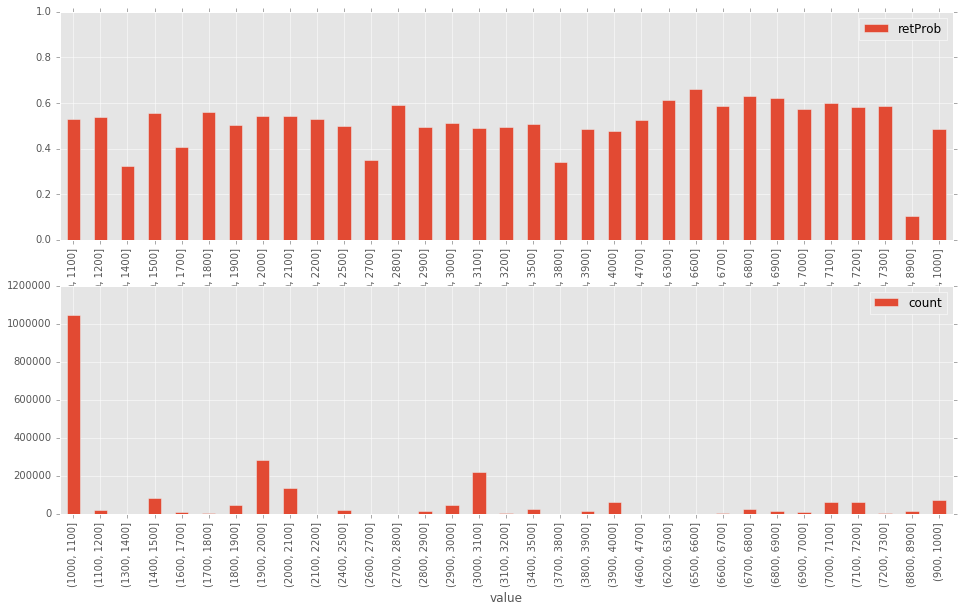

In [96]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches([16, 9])
evaluation.loc['100', ['retProb']].plot(kind='bar', ax=axes[0], ylim=[0, 1])
evaluation.loc['100', ['count']].plot(kind='bar', ax=axes[1])

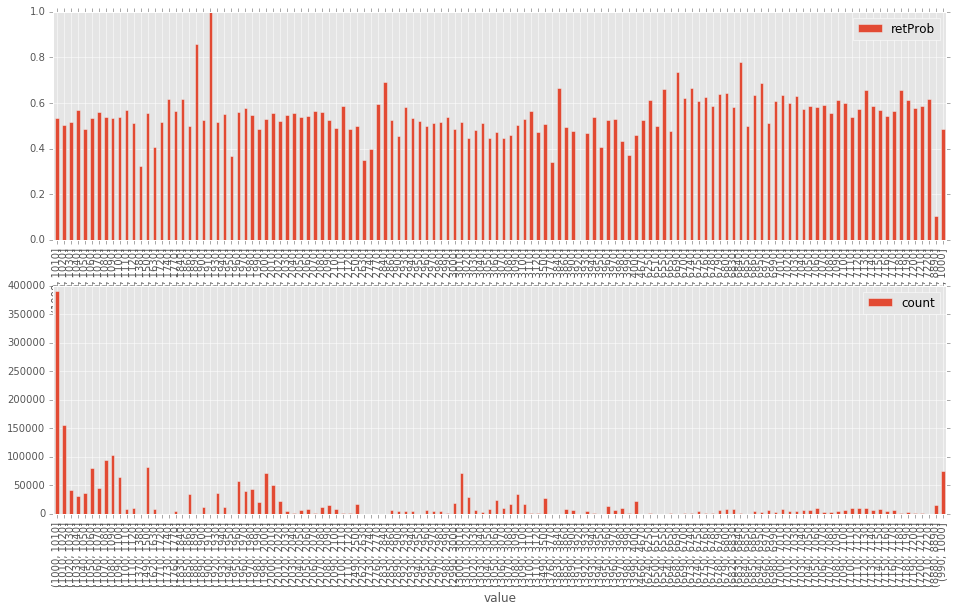

In [99]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches([16, 9])
evaluation.loc['10', ['retProb']].plot(kind='bar', ax=axes[0], ylim=[0, 1])
evaluation.loc['10', ['count']].plot(kind='bar', ax=axes[1])

# Significance
Given a bin size. **How many rows are in a bin that has a significant retProb (0.45< | >0.55)?**

You can see that binning comes with great information loss.

In [128]:
bins1000 = evaluation.loc['1000',:]
outlierBins1000 = bins1000[(bins1000.retProb < 0.45) | (bins1000.retProb > 0.55)]

print(outlierBins1000['count'].sum())
outlierBins1000['count'].sum() / len(colors)

195945


0.08544729387467469

In [129]:
bins100 = evaluation.loc['100',:]
outlierBins100 = bins100[(bins100.retProb < 0.45) | (bins100.retProb > 0.55)]

print(outlierBins100['count'].sum())
outlierBins100['count'].sum() / len(colors)

292885


0.12772069032883765

In [130]:
bins10 = evaluation.loc['10',:]
outlierBins10 = bins10[(bins10.retProb < 0.45) | (bins10.retProb > 0.55)]

print(outlierBins10['count'].sum())
outlierBins10['count'].sum() / len(colors)

598859


0.2611492049426819

In [131]:
bins1 = evaluation.loc['colorCode',:]
outlierBins1 = bins1[(bins1.retProb < 0.45) | (bins1.retProb > 0.55)]

print(outlierBins1['count'].sum())
outlierBins1['count'].sum() / len(colors)

740415


0.3228786552053753